# normalizatation

# normalization us  technique often applied as part of data prepartation foe machine learning the goal of normalization is to change
# the values of numeric value  in the dataset to use a common scale without disorting differences in the ranges of values or losing information

# types of normalization technique
# 1 MinMaxScaling
# 2 mean normalization
# 3 max absolute scaling
# 4 robust scaling

# formula
# Xi=Xi-Xmin/Xmax-Xmin

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine.csv',header=None,usecols=[0,1],dtype={'0':int})
df.columns=['Alcohol', 'Malic acid']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Alcohol     178 non-null    float64
 1   Malic acid  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

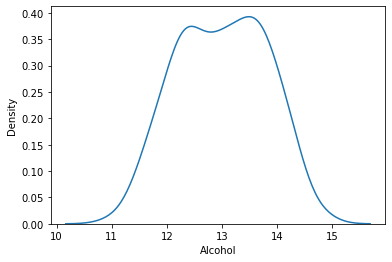

In [5]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

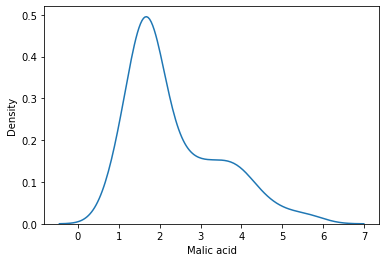

In [6]:
sns.kdeplot(df['Malic acid'])


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Malic acid', axis=1),
                                                    df['Malic acid'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 1), (54, 1))

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
np.round(X_train.describe())

,Alcohol
count,124.0
mean,13.0
std,1.0
min,11.0
25%,12.0
50%,13.0
75%,14.0
max,15.0


In [21]:
np.round(X_train_scaled.describe())

,Alcohol
count,124.0
mean,-0.0
std,1.0
min,-2.0
25%,-1.0
50%,0.0
75%,0.0
max,1.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train.describe())

,Alcohol
count,124.0
mean,13.0
std,1.0
min,11.0
25%,12.0
50%,13.0
75%,14.0
max,15.0


In [25]:
np.round(X_train_scaled.describe())

,Alcohol
count,124.0
mean,1.0
std,0.0
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
s